In [1]:
import json
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import os
import sys

In [2]:
project_root = os.path.abspath("..")
sys.path.insert(0, project_root)

from tools.body_parts_map import keypoint_map

In [3]:
body_parts_map = {
    "head": [0, 1, 2, 3, 4],
    "left_arm": [5, 7, 9],
    "right_arm": [6, 8, 10],
    "torso": [5, 6, 11, 12],
    "left_hand": list(range(12, 34)),
    "right_hand": list(range(34, 55)),
}

face_parts_map = {
    "face_contour": list(range(0, 17)),
    "nose": list(range(27, 36)),
    "right_eye": list(range(17, 22)) + list(range(36, 42)),
    "left_eye": list(range(22, 27)) + list(range(42, 48)),
    "mouth": list(range(48, 68)),
}

## Input x Gradients

In [4]:
file_path = 'results/gradient_input_saliency_averages_face_body.json'
with open(file_path, 'r') as f:
    ixg_saliency_averages_face_body = json.load(f)

In [5]:
artist = "Abhiram Bode"
song = "Entha Bhagyamu"
ixg_saliency_data = ixg_saliency_averages_face_body[artist][song]

face_ixg_saliency = np.array(ixg_saliency_data['face_saliency_per_keypoint'])
body_ixg_saliency = np.array(ixg_saliency_data['body_saliency_per_keypoint'])

### Average Analysis

In [6]:
face_keypoint_names = []
body_keypoint_names = []

face_start_index = 23
for i in range(len(face_ixg_saliency)):
    face_keypoint_names.append(keypoint_map[i + face_start_index])

lower_body_start_index = 13
for i in range(len(body_ixg_saliency)):
    index = i
    if index >= lower_body_start_index:
        index = i + len(face_ixg_saliency) + face_start_index - lower_body_start_index
    body_keypoint_names.append(keypoint_map[index])

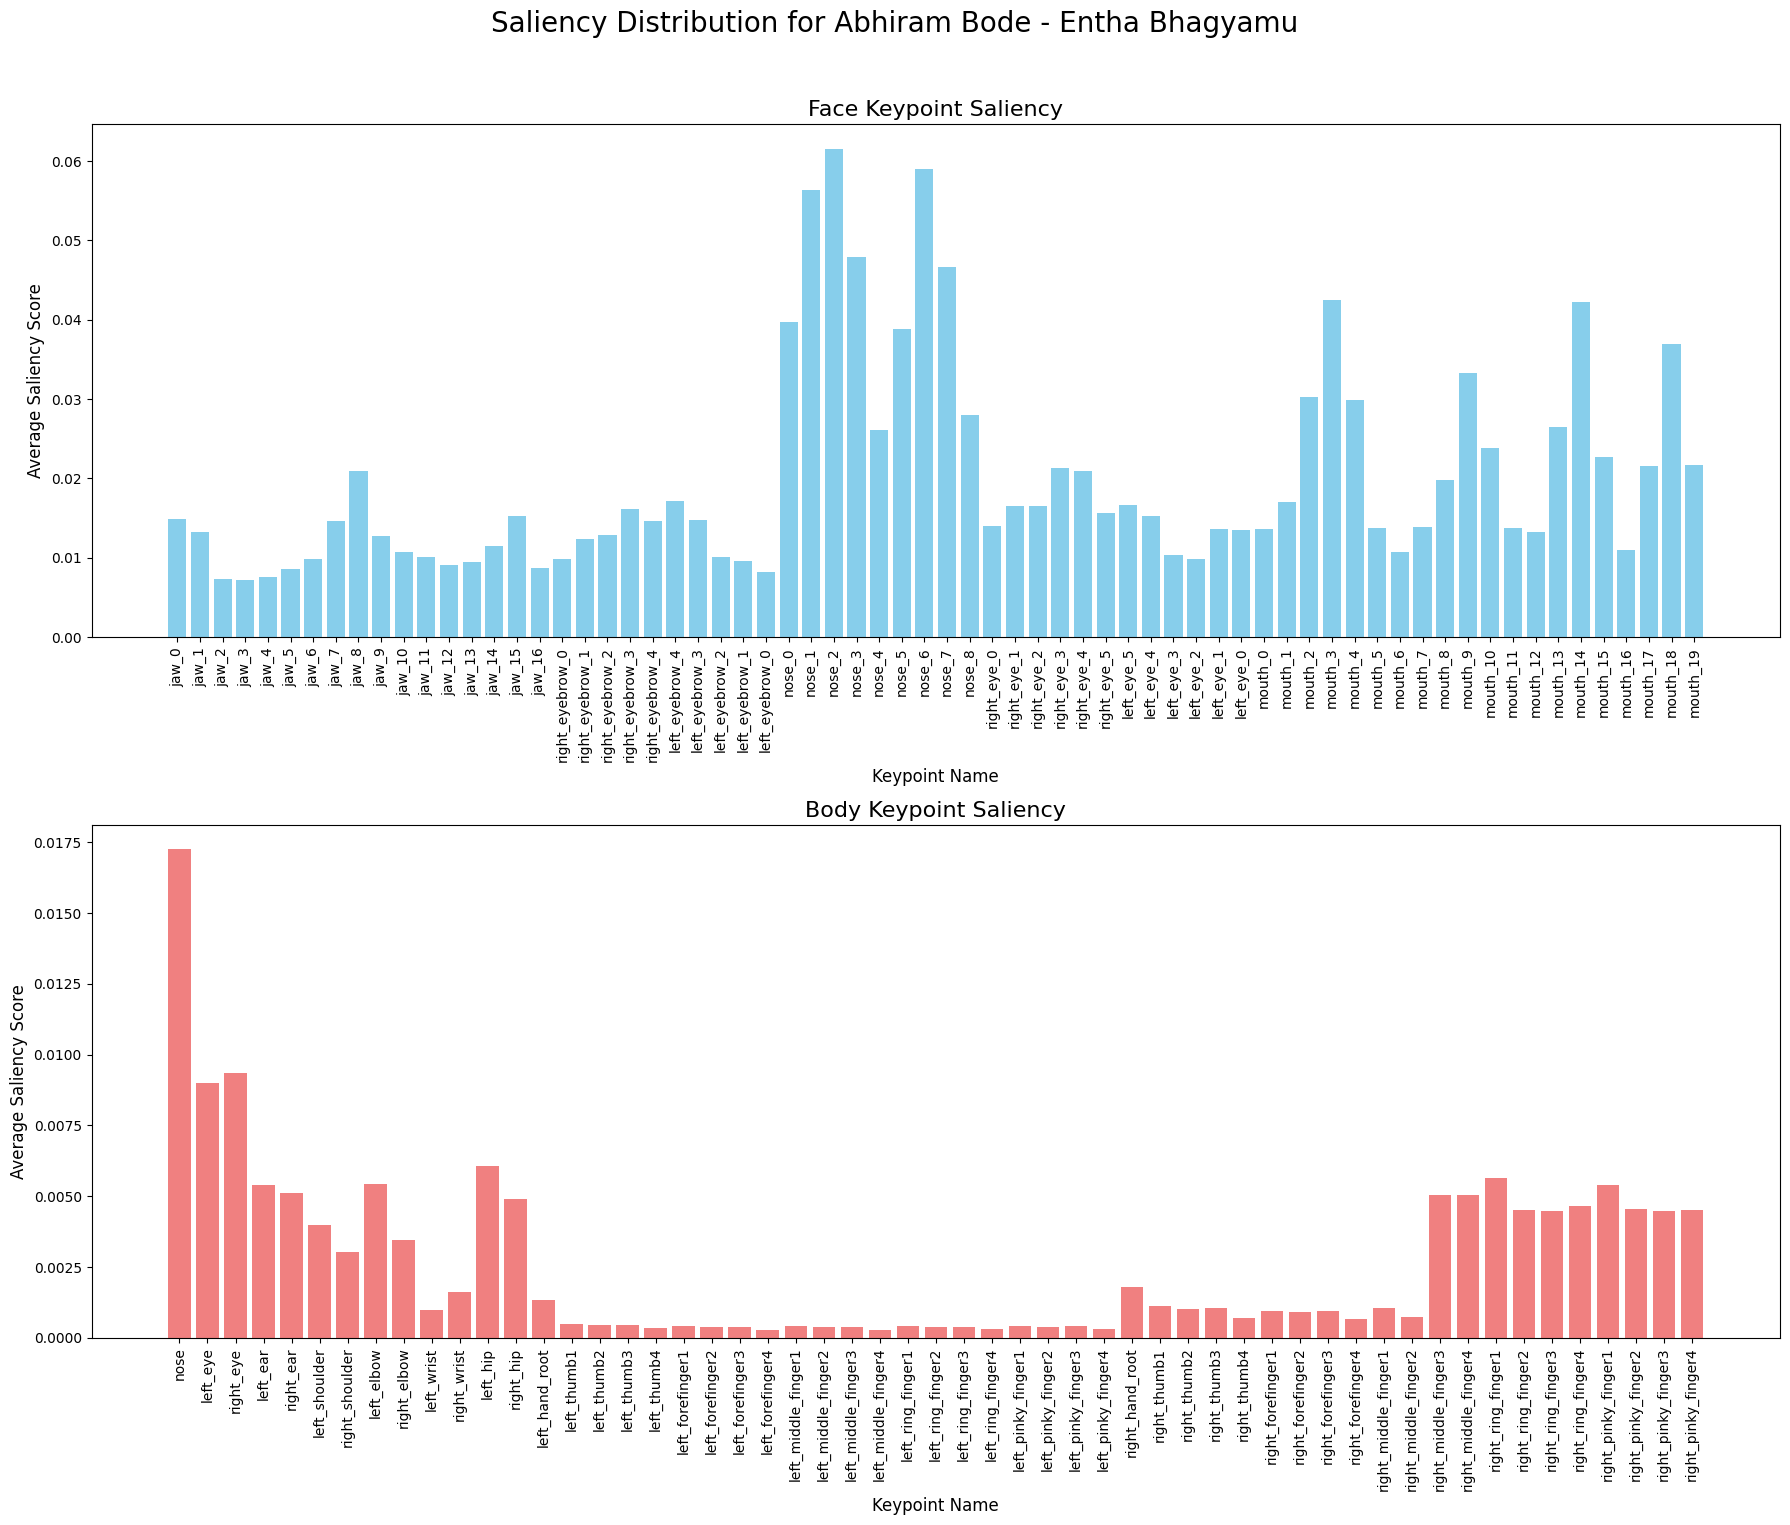

In [7]:
fig, axes = plt.subplots(2, 1, figsize=(18, 16))
fig.suptitle(f'Saliency Distribution for {artist} - {song}', fontsize=20)

# --- Plot 1: Face Keypoints ---
axes[0].bar(face_keypoint_names, face_ixg_saliency, color="skyblue")
axes[0].set_title('Face Keypoint Saliency', fontsize=16)
axes[0].set_xlabel('Keypoint Name', fontsize=12)
axes[0].set_ylabel('Average Saliency Score', fontsize=12)
axes[0].tick_params(axis='x', rotation=90)

# --- Plot 2: Body Keypoints ---
# Pass the names directly to the 'x' parameter
axes[1].bar(body_keypoint_names, body_ixg_saliency, color="lightcoral")
axes[1].set_title('Body Keypoint Saliency', fontsize=16)
axes[1].set_xlabel('Keypoint Name', fontsize=12)
axes[1].set_ylabel('Average Saliency Score', fontsize=12)
axes[1].tick_params(axis='x', rotation=90)


# --- Display the plot ---
plt.tight_layout(rect=[0, 0.03, 1, 0.96]) # Adjust layout to make room for suptitle
plt.show()

In [8]:
body_part_ixg_saliency = {}
for part, indices in body_parts_map.items():
    body_part_ixg_saliency[part] = np.mean(body_ixg_saliency[indices])

face_part_ixg_saliency = {}
for part, indices in face_parts_map.items():
    face_part_ixg_saliency[part] = np.mean(face_ixg_saliency[indices])

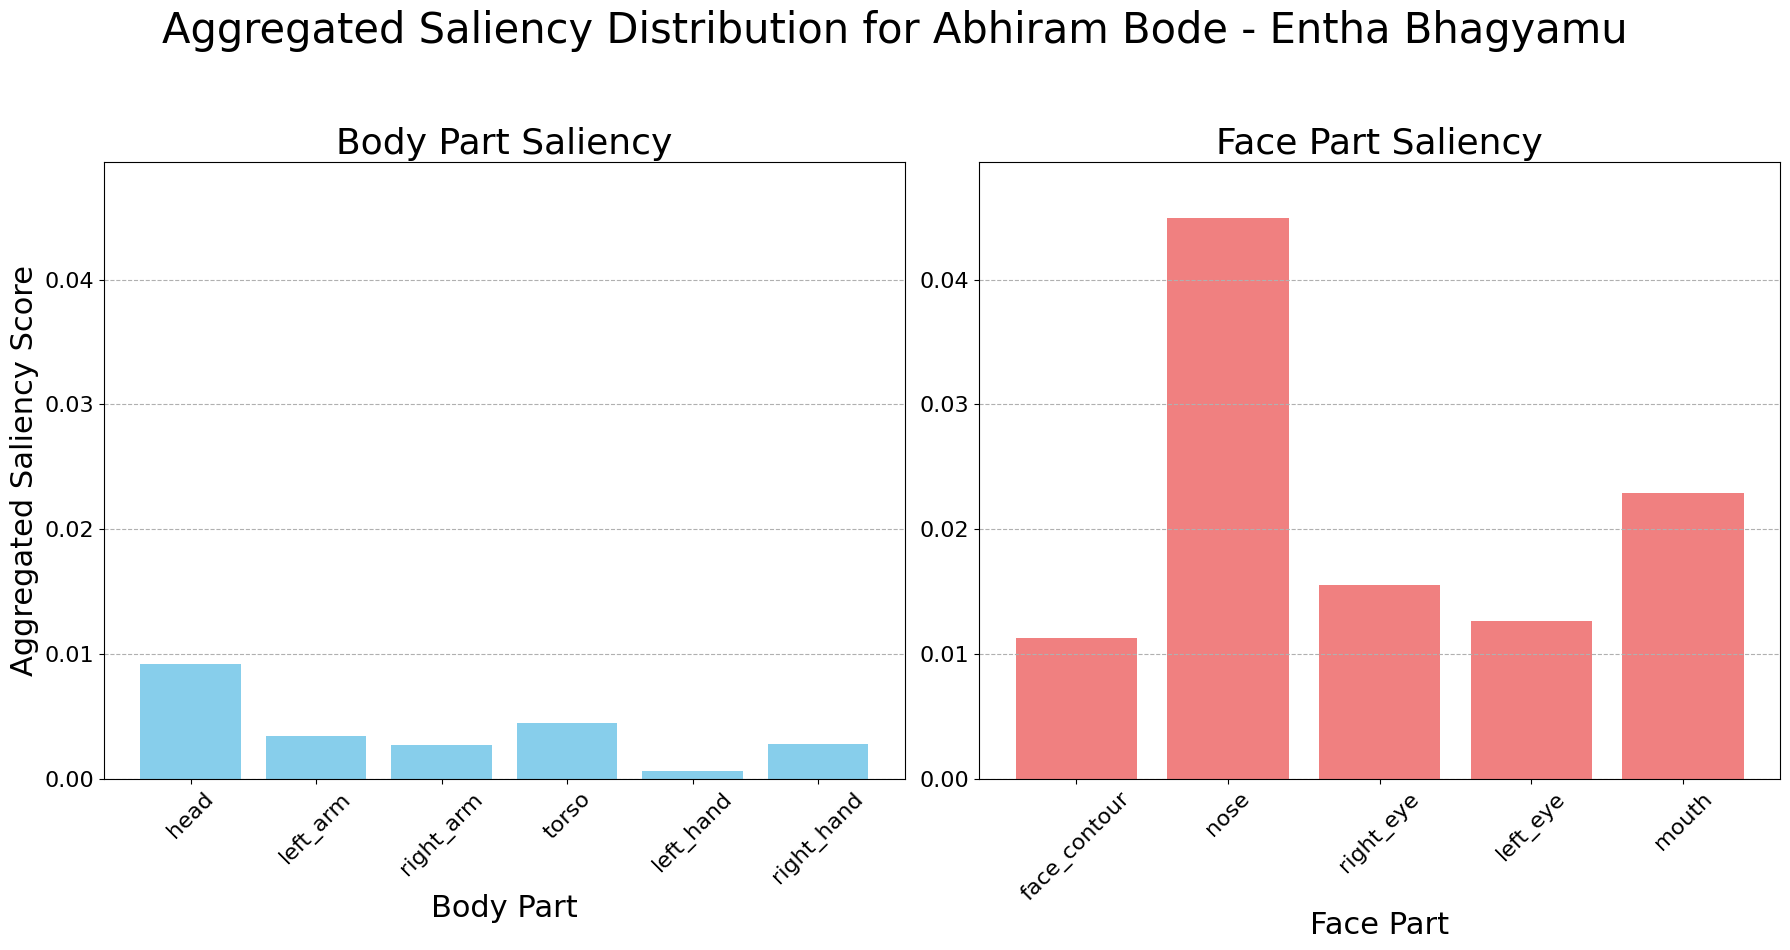

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(18, 9))
fig.suptitle(f'Aggregated Saliency Distribution for {artist} - {song}', fontsize=30, y=1.05)

# --- Plot 1: Body Parts ---
body_part_names = list(body_part_ixg_saliency.keys())
body_part_values = list(body_part_ixg_saliency.values())
axes[0].bar(body_part_names, body_part_values, color="skyblue")
axes[0].set_title('Body Part Saliency', fontsize=26)
axes[0].set_xlabel('Body Part', fontsize=22)
axes[0].set_ylabel('Aggregated Saliency Score', fontsize=22)
axes[0].tick_params(axis='x', rotation=45, labelsize=16)
axes[0].tick_params(axis='y', labelsize=16)
axes[0].grid(axis='y', linestyle='--')  # Add horizontal grid lines

# --- Plot 2: Face Parts ---
face_part_names = list(face_part_ixg_saliency.keys())
face_part_values = list(face_part_ixg_saliency.values())
axes[1].bar(face_part_names, face_part_values, color="lightcoral")
axes[1].set_title('Face Part Saliency', fontsize=26)
axes[1].set_xlabel('Face Part', fontsize=22)
axes[1].tick_params(axis='x', rotation=45, labelsize=16)
axes[1].tick_params(axis='y', labelsize=16)
axes[1].grid(axis='y', linestyle='--')  # Add horizontal grid lines

# --- Ensure both y-axes have the same scale ---
max_saliency = max(max(body_part_values), max(face_part_values))
axes[0].set_ylim([0, max_saliency * 1.1])  # Add a small buffer for better visualization
axes[1].set_ylim([0, max_saliency * 1.1])

plt.tight_layout()
plt.show()

### Temporal Analysis

In [10]:
file_path = 'results/gradient_input_saliency_scores_face_body.json'
with open(file_path, 'r') as f:
    ixg_saliency_scores_face_body = json.load(f)

In [11]:
artist = "Abhiram Bode"
song = "Entha Bhagyamu"
ixg_saliency_scores_data = ixg_saliency_scores_face_body[artist][song]

In [12]:
ixg_face_saliency_scores = np.array(ixg_saliency_scores_data['face_saliency_per_keypoint'])
ixg_body_saliency_scores = np.array(ixg_saliency_scores_data['body_saliency_per_keypoint'])
ixg_audio_saliency_scores = np.array(ixg_saliency_scores_data['mix_saliency'])

# Aggregate saliency scores for each part over time (chunks)
temporal_ixg_body_part_saliency = {part: [] for part in body_parts_map.keys()}
for chunk_saliency in ixg_body_saliency_scores:
    for part, indices in body_parts_map.items():
        temporal_ixg_body_part_saliency[part].append(np.sum(chunk_saliency[indices]))

temporal_ixg_face_part_saliency = {part: [] for part in face_parts_map.keys()}
for chunk_saliency in ixg_face_saliency_scores:
    for part, indices in face_parts_map.items():
        temporal_ixg_face_part_saliency[part].append(np.sum(chunk_saliency[indices]))

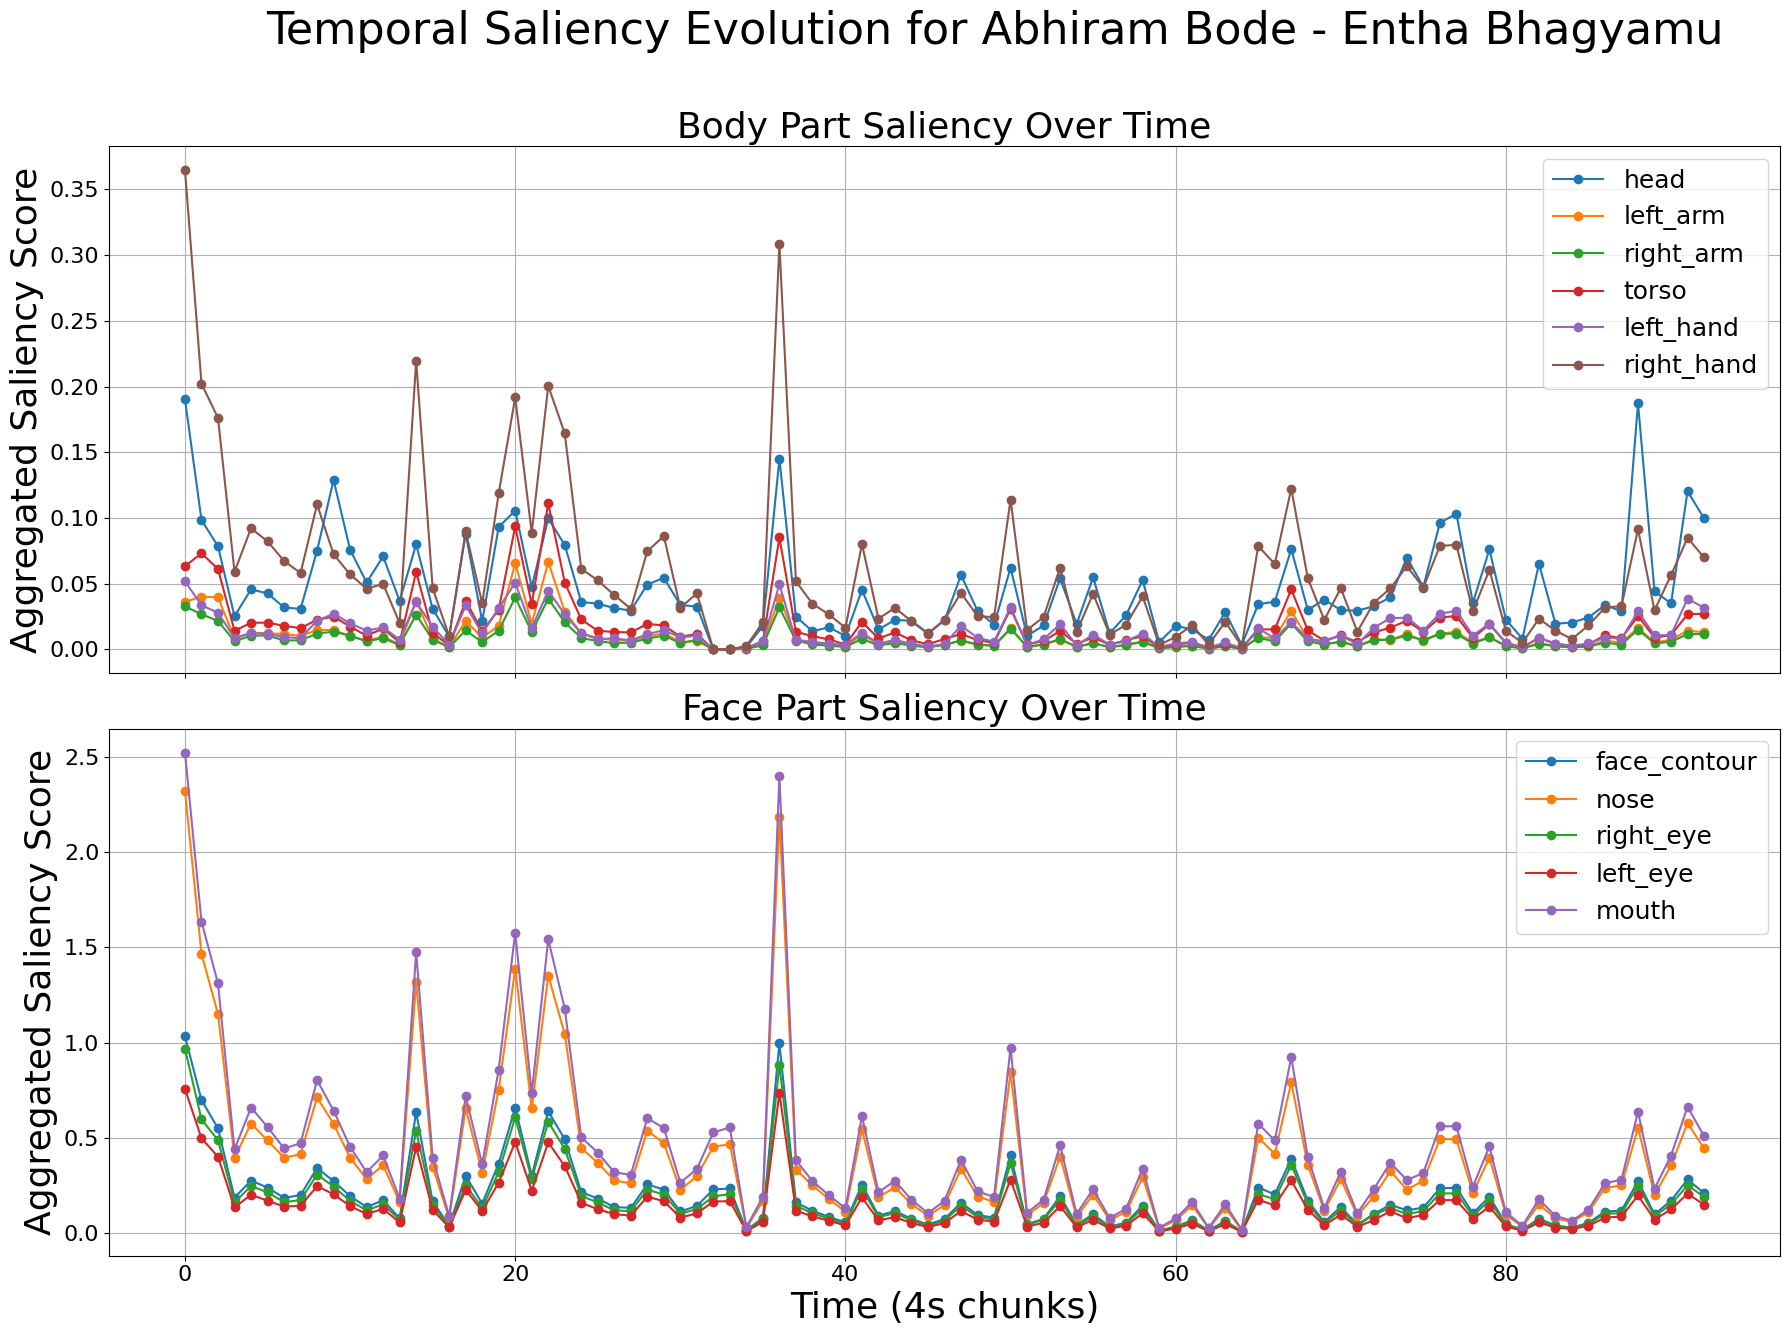

In [13]:
fig, axes = plt.subplots(2, 1, figsize=(20, 14), sharex=True)
fig.suptitle(f'Temporal Saliency Evolution for {artist} - {song}', fontsize=32)

# --- Plot 1: Body Parts ---
for part, scores in temporal_ixg_body_part_saliency.items():
    axes[0].plot(scores, label=part, marker='o', linestyle='-')
axes[0].set_title('Body Part Saliency Over Time', fontsize=26)
axes[0].set_ylabel('Aggregated Saliency Score', fontsize=26)
axes[0].legend(loc='upper right', fontsize=18)
axes[0].tick_params(labelsize=16)
axes[0].grid(True)


# --- Plot 2: Face Parts ---
for part, scores in temporal_ixg_face_part_saliency.items():
    axes[1].plot(scores, label=part, marker='o', linestyle='-')
axes[1].set_title('Face Part Saliency Over Time', fontsize=26)
axes[1].set_xlabel('Time (4s chunks)', fontsize=26)
axes[1].set_ylabel('Aggregated Saliency Score', fontsize=26)
axes[1].legend(loc='upper right', fontsize=18)
axes[1].tick_params(labelsize=16)
axes[1].grid(True)

# # --- Plot 3: Audio Saliency ---
# axes[2].plot(audio_saliency_scores, label='Audio Saliency', color='purple', marker='o', linestyle='-')
# axes[2].set_title('Audio Saliency Over Time', fontsize=20)
# axes[2].set_xlabel('Time (4s chunks)', fontsize=12)
# axes[2].set_ylabel('Saliency Score', fontsize=16)
# axes[2].legend(loc='upper right', fontsize=18)
# axes[2].grid(True)

plt.tight_layout(rect=[0, 0.03, 0.9, 0.96]) # Adjust layout to make room for suptitle and legend

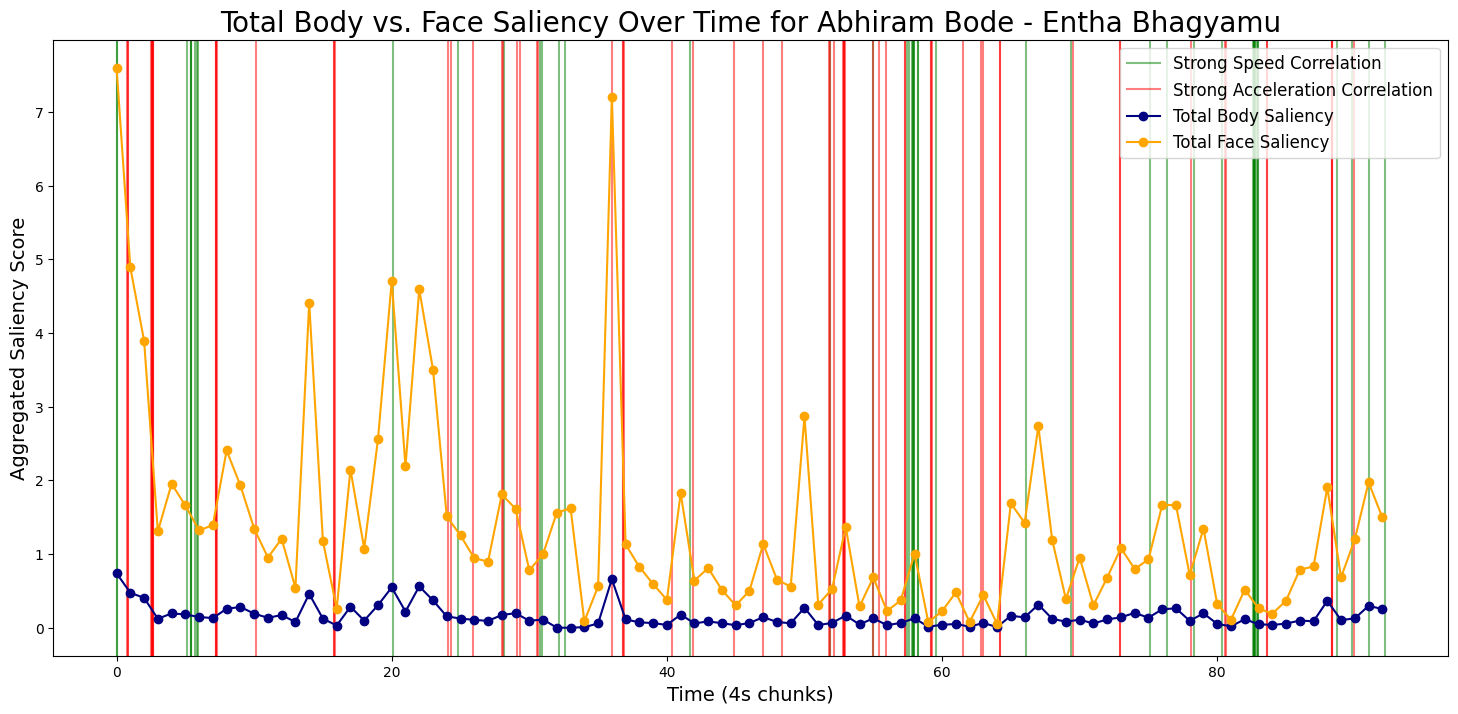

In [16]:
# Load the strong correlation windows data
correlation_file_path = '/home/gabriel/theo/masters-thesis/dataset/Abhiram Bode/Entha Bhagyamu/vocal/strong_correlation_05s_windows.json'
with open(correlation_file_path, 'r') as f:
    correlation_data = json.load(f)

strong_windows_speed = correlation_data['general']['speed']
strong_windows_accel = correlation_data['general']['accel']

# Extract the time in seconds and convert to chunk index (time / 4s)
speed_chunks = [window[0] / 4 for window in strong_windows_speed if abs(window[1]) > 0.66]
accel_chunks = [window[0] / 4 for window in strong_windows_accel if abs(window[1]) > 0.66]

# Aggregate all body part saliencies and all face part saliencies over time
average_body_saliency_over_time = np.sum(list(temporal_ixg_body_part_saliency.values()), axis=0)
average_face_saliency_over_time = np.sum(list(temporal_ixg_face_part_saliency.values()), axis=0)

# --- Create a single plot for aggregated body and face saliency ---
plt.figure(figsize=(18, 8))

# --- Add vertical lines for strong correlations ---
for i, chunk in enumerate(speed_chunks):
    plt.axvline(x=chunk, color='green', linewidth=1.5, alpha=0.5, label='Strong Speed Correlation' if i == 0 else "")
for i, chunk in enumerate(accel_chunks):
    plt.axvline(x=chunk, color='red', linewidth=1.5, alpha=0.5, label='Strong Acceleration Correlation' if i == 0 else "")

plt.plot(average_body_saliency_over_time, label='Total Body Saliency', marker='o', linestyle='-', color='navy')
plt.plot(average_face_saliency_over_time, label='Total Face Saliency', marker='o', linestyle='-', color='orange')


# --- Add titles and labels ---
plt.title(f'Total Body vs. Face Saliency Over Time for {artist} - {song}', fontsize=20)
plt.xlabel('Time (4s chunks)', fontsize=14)
plt.ylabel('Aggregated Saliency Score', fontsize=14)
plt.legend(fontsize=12, loc='upper right')

## Integrated Gradients

In [4]:
ig_file_path = 'results/integrated_gradients_new_baseline_face_body.json'
with open(ig_file_path, 'r') as f:
    integrated_gradient_face_body = json.load(f)

In [5]:
artist = "Abhiram Bode"
song = "Entha Bhagyamu"
ig_scores_data = integrated_gradient_face_body[artist][song]

face_ig_saliency = np.array(ig_scores_data['face_saliency'])
body_ig_saliency = np.array(ig_scores_data['body_saliency'])

### Average analysis

In [6]:
face_keypoint_names = []
body_keypoint_names = []

face_start_index = 23
for i in range(len(face_ig_saliency[0])):
    face_keypoint_names.append(keypoint_map[i + face_start_index])

lower_body_start_index = 13
for i in range(len(body_ig_saliency[0])):
    index = i
    if index >= lower_body_start_index:
        index = i + len(face_ig_saliency[0]) + face_start_index - lower_body_start_index
    body_keypoint_names.append(keypoint_map[index])

In [7]:
average_body_ig_saliency = body_ig_saliency.mean(axis=0)
average_face_ig_saliency = face_ig_saliency.mean(axis=0)

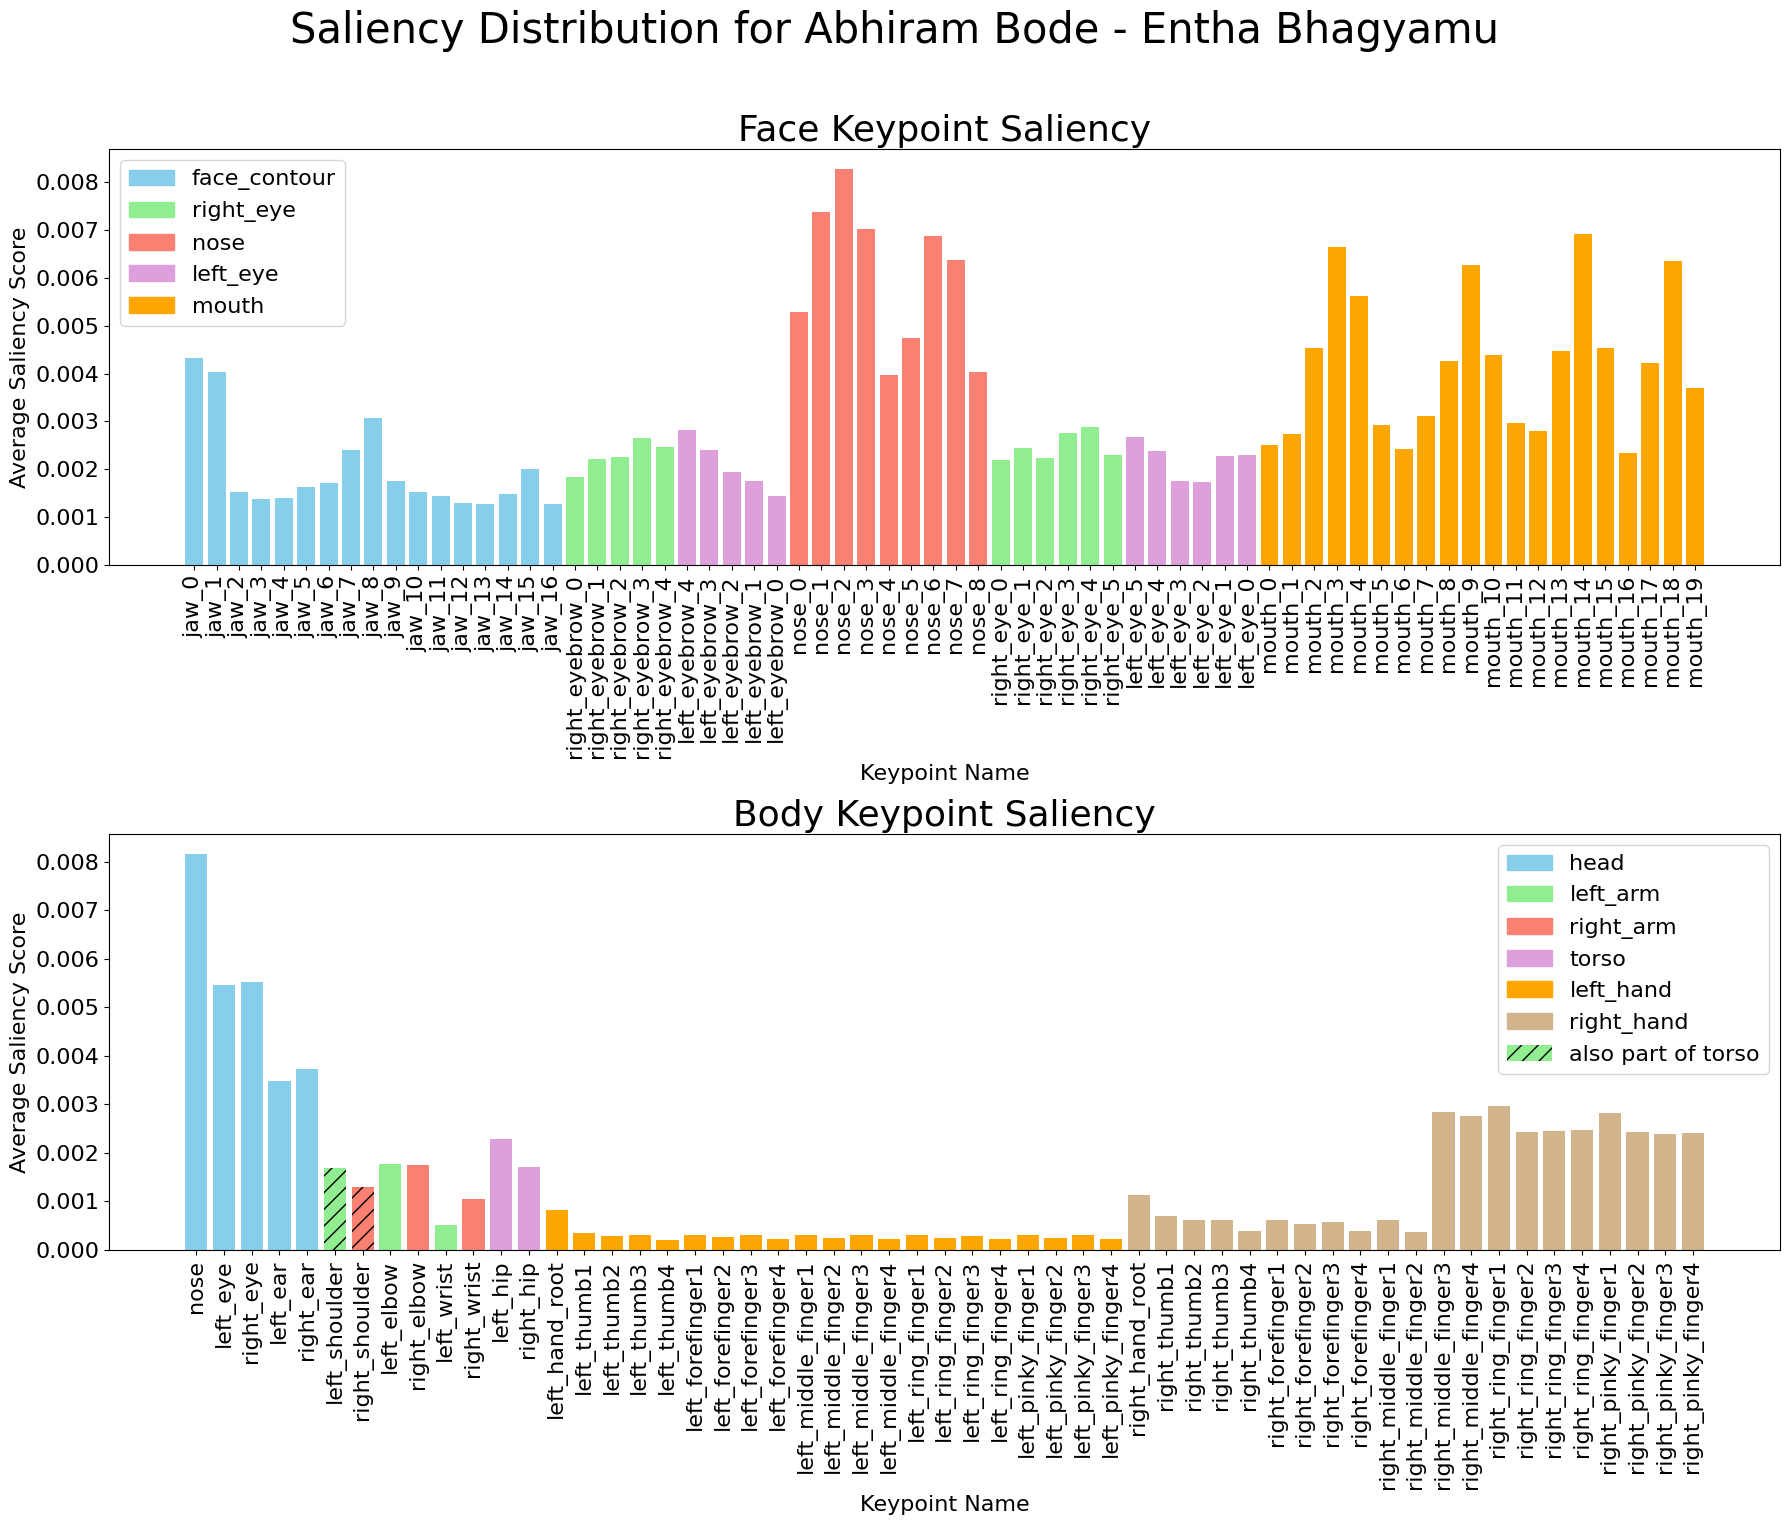

In [52]:
fig, axes = plt.subplots(2, 1, figsize=(18, 16))
fig.suptitle(f'Saliency Distribution for {artist} - {song}', fontsize=30)

# Define colors for different face parts
face_colors = {
    'face_contour': 'skyblue',
    'right_eye': 'lightgreen',
    'nose': 'salmon',
    'left_eye': 'plum',
    'mouth': 'orange'
}

# Define colors for different body parts
body_colors = {
    'head': 'skyblue',
    'left_arm': 'lightgreen',
    'right_arm': 'salmon',
    'torso': 'plum',
    'left_hand': 'orange',
    'right_hand': 'tan'
}

# --- Plot 1: Face Keypoints ---
bar_colors_face = []
for i in range(len(average_face_ig_saliency)):
    # Find which part this keypoint belongs to
    for part_name, indices in face_parts_map.items():
        if i in indices:
            bar_colors_face.append(face_colors[part_name])
            break

bars_face = axes[0].bar(face_keypoint_names, average_face_ig_saliency, color=bar_colors_face)
axes[0].set_title('Face Keypoint Saliency', fontsize=26)
axes[0].set_xlabel('Keypoint Name', fontsize=16)
axes[0].set_ylabel('Average Saliency Score', fontsize=16)
axes[0].tick_params(axis='x', rotation=90, labelsize=16)
axes[0].tick_params(axis='y', labelsize=16)


# Add legend for face parts
legend_elements_face = [plt.Rectangle((0,0),1,1, color=color, label=part) 
                       for part, color in face_colors.items()]
axes[0].legend(handles=legend_elements_face, loc='upper left', fontsize=16)

# --- Plot 2: Body Keypoints ---
bar_colors_body = []
hatches = []

for i in range(len(average_body_ig_saliency)):
    # Special handling for shoulder keypoints (dual membership)
    if body_keypoint_names[i] == 'left_shoulder':
        bar_colors_body.append(body_colors['left_arm'])
        hatches.append('//')  # Hatching to indicate it's also part of the torso
    elif body_keypoint_names[i] == 'right_shoulder':
        bar_colors_body.append(body_colors['right_arm'])
        hatches.append('//')  # Hatching to indicate it's also part of the torso
    else:
        # Find which part this keypoint belongs to
        hatches.append('')
        found = False
        for part_name, indices in body_parts_map.items():
            if i in indices:
                bar_colors_body.append(body_colors[part_name])
                found = True
                break
            # Special case for indices that need remapping
            elif i >= 13 and (i + 10) in indices:
                bar_colors_body.append(body_colors[part_name])
                found = True
                break
        if not found:
            bar_colors_body.append('gray')  # Default color

bars_body = axes[1].bar(body_keypoint_names, average_body_ig_saliency, color=bar_colors_body)

# Add hatching to indicate dual membership
for bar, hatch in zip(bars_body, hatches):
    bar.set_hatch(hatch)

axes[1].set_title('Body Keypoint Saliency', fontsize=26)
axes[1].set_xlabel('Keypoint Name', fontsize=16)
axes[1].set_ylabel('Average Saliency Score', fontsize=16)
axes[1].tick_params(axis='x', rotation=90, labelsize=16)
axes[1].tick_params(axis='y', labelsize=16)


# Add legend for body parts
legend_elements_body = [plt.Rectangle((0,0),1,1, color=color, label=part) 
                       for part, color in body_colors.items()]
                       
# Add special legend entry for dual membership with hatching
hatch_rect = mpatches.Patch(facecolor=body_colors['left_arm'], hatch='//', label='also part of torso')
legend_elements_body.append(hatch_rect)

axes[1].legend(handles=legend_elements_body, loc='upper right', fontsize=16)

# --- Display the plot ---
plt.tight_layout(rect=[0, 0.03, 1, 0.96]) # Adjust layout to make room for suptitle
plt.show()

In [33]:
body_part_ig_saliency = {}
for part, indices in body_parts_map.items():
    part_saliencies_over_time = []
    for chunk_saliency in body_ig_saliency:
        part_saliencies_over_time.append(np.mean(chunk_saliency[indices]))
    body_part_ig_saliency[part] = np.mean(part_saliencies_over_time)

face_part_ig_saliency = {}
for part, indices in face_parts_map.items():
    part_saliencies_over_time = []
    for chunk_saliency in face_ig_saliency:
        part_saliencies_over_time.append(np.mean(chunk_saliency[indices]))
    face_part_ig_saliency[part] = np.mean(part_saliencies_over_time)


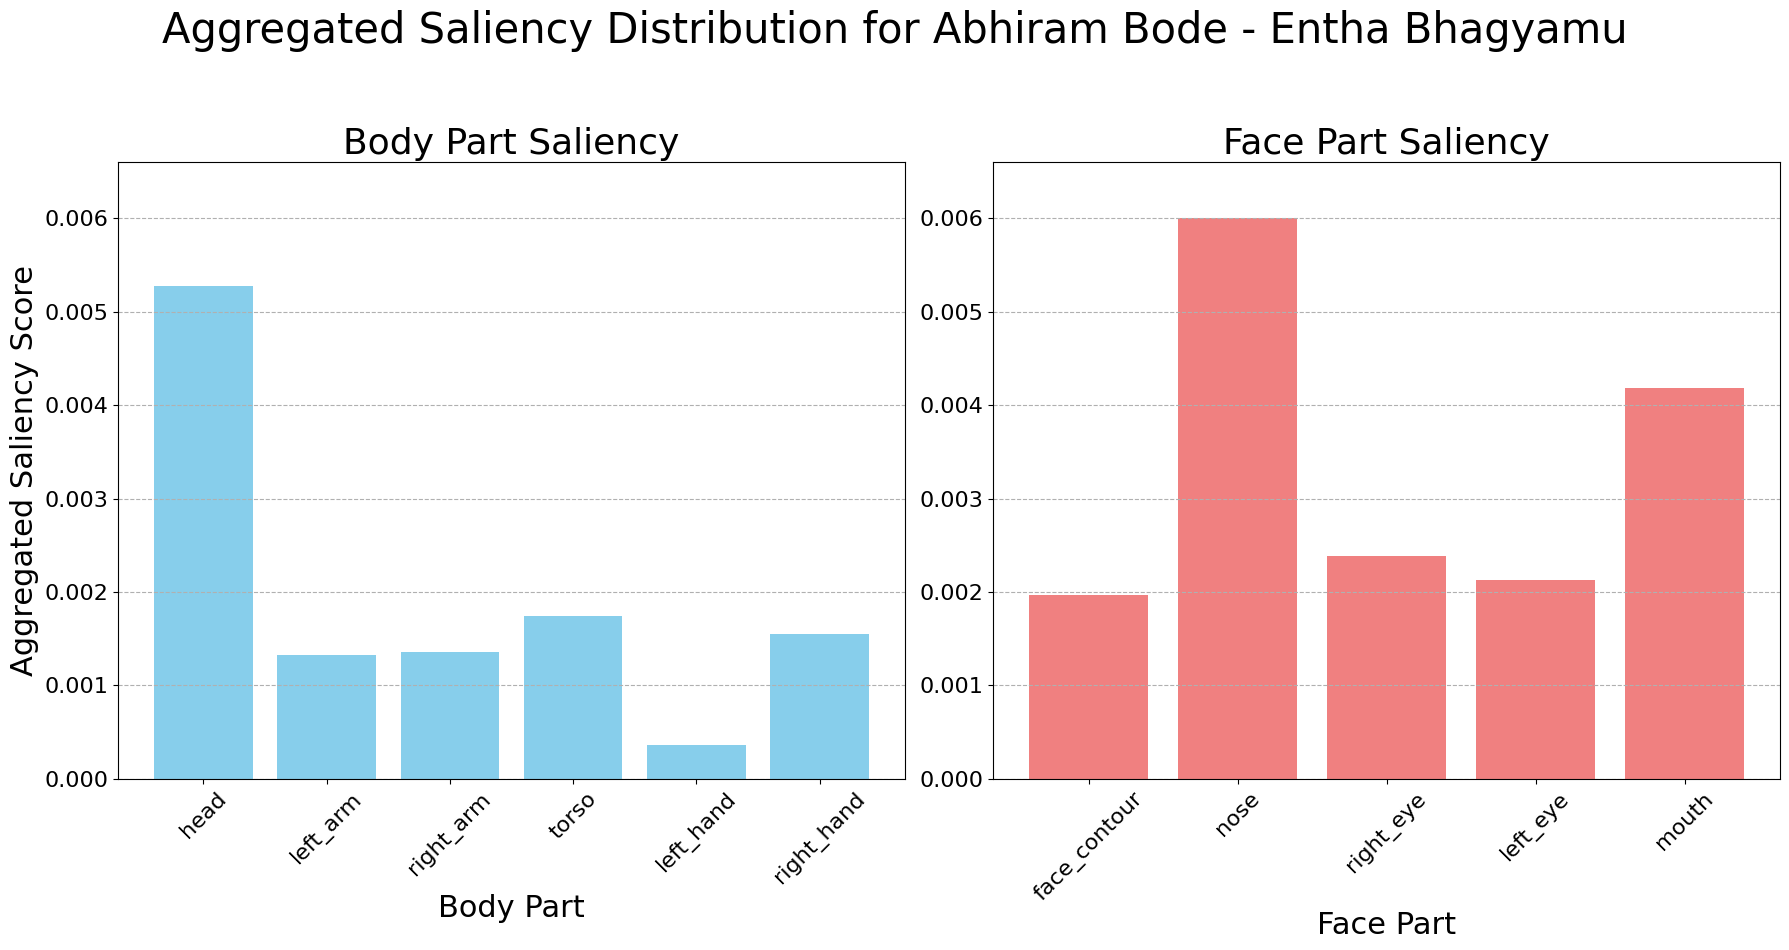

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(18, 9))
fig.suptitle(f'Aggregated Saliency Distribution for {artist} - {song}', fontsize=30, y=1.05)

# --- Plot 1: Body Parts with corrected method ---
corrected_body_part_names = list(body_part_ig_saliency.keys())
corrected_body_part_values = list(body_part_ig_saliency.values())
axes[0].bar(corrected_body_part_names, corrected_body_part_values, color="skyblue")
axes[0].set_title('Body Part Saliency', fontsize=26)
axes[0].set_xlabel('Body Part', fontsize=22)
axes[0].set_ylabel('Aggregated Saliency Score', fontsize=22)
axes[0].tick_params(axis='x', rotation=45, labelsize=16)
axes[0].tick_params(axis='y', labelsize=16)
axes[0].grid(axis='y', linestyle='--')  # Add horizontal grid lines

# --- Plot 2: Face Parts with corrected method ---
corrected_face_part_names = list(face_part_ig_saliency.keys())
corrected_face_part_values = list(face_part_ig_saliency.values())
axes[1].bar(corrected_face_part_names, corrected_face_part_values, color="lightcoral")
axes[1].set_title('Face Part Saliency', fontsize=26)
axes[1].set_xlabel('Face Part', fontsize=22)
axes[1].tick_params(axis='x', rotation=45, labelsize=16)
axes[1].tick_params(axis='y', labelsize=16)
axes[1].grid(axis='y', linestyle='--')  # Add horizontal grid lines

# --- Ensure both y-axes have the same scale ---
max_saliency = max(max(corrected_body_part_values), max(corrected_face_part_values))
axes[0].set_ylim([0, max_saliency * 1.1])
axes[1].set_ylim([0, max_saliency * 1.1])

plt.tight_layout()
plt.show()

### Temporal analysis

In [41]:
face_ig_scores = np.array(ig_scores_data['face_saliency'])
body_ig_scores = np.array(ig_scores_data['body_saliency'])
audio_ig_scores = np.array(ig_scores_data['mix_saliency'])

# Aggregate saliency scores for each part over time (chunks)
temporal_body_part_ig = {part: [] for part in body_parts_map.keys()}
for chunk_saliency in body_ig_scores:
    for part, indices in body_parts_map.items():
        temporal_body_part_ig[part].append(np.sum(chunk_saliency[indices]))

temporal_face_part_ig = {part: [] for part in face_parts_map.keys()}
for chunk_saliency in face_ig_scores:
    for part, indices in face_parts_map.items():
        temporal_face_part_ig[part].append(np.sum(chunk_saliency[indices]))

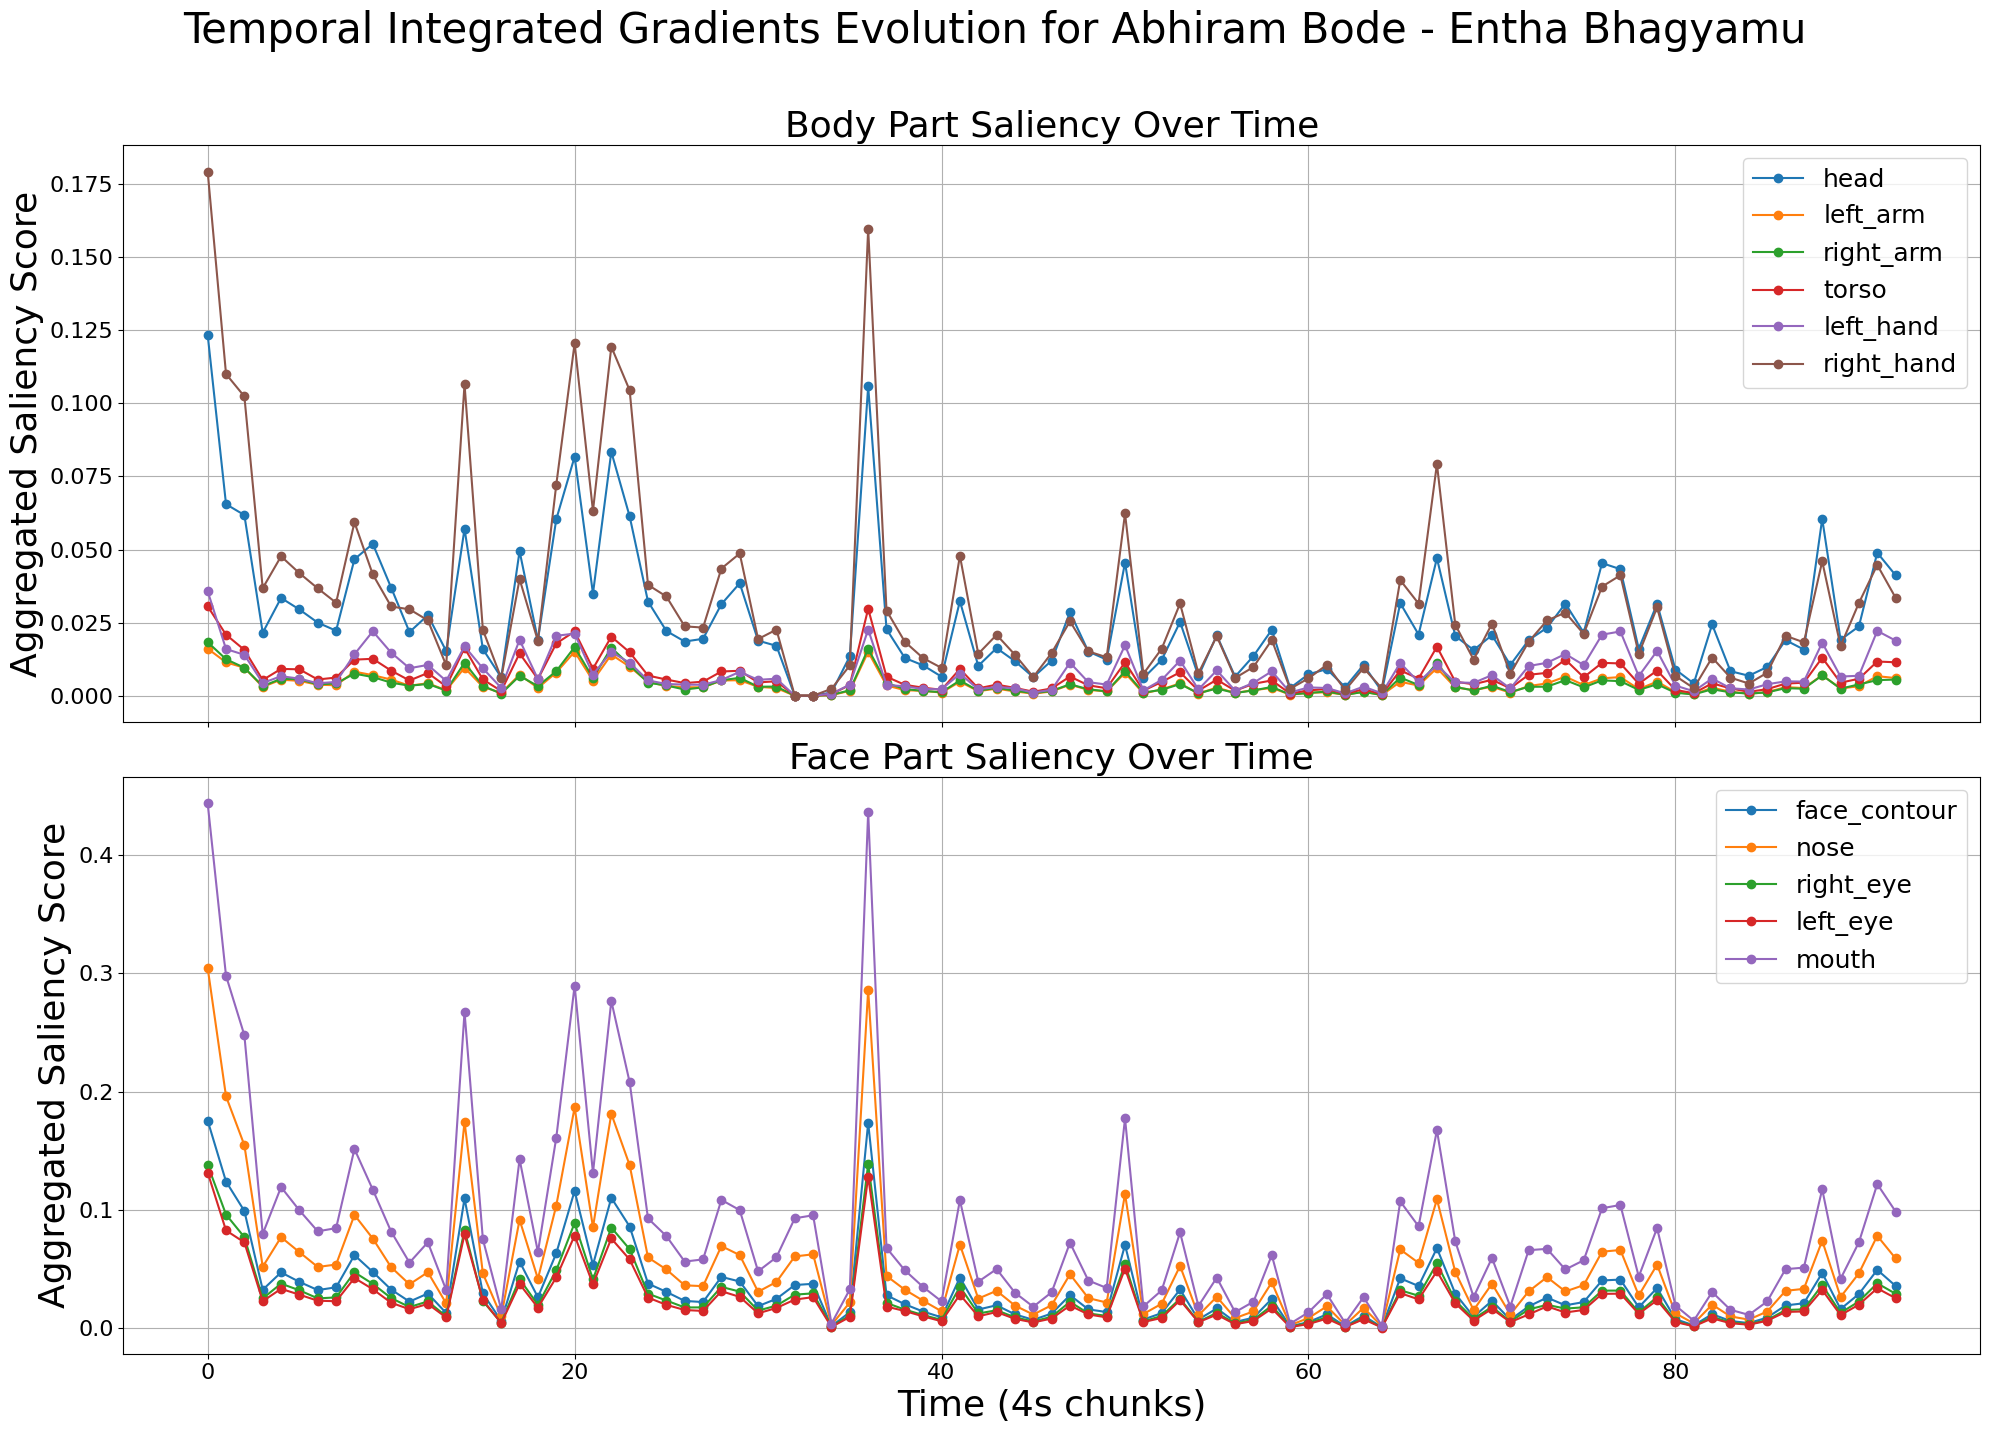

In [46]:
fig, axes = plt.subplots(2, 1, figsize=(20, 14), sharex=True)
fig.suptitle(f'Temporal Integrated Gradients Evolution for {artist} - {song}', fontsize=30, y=1.02)

# --- Plot 1: Body Parts ---
for part, scores in temporal_body_part_ig.items():
    axes[0].plot(scores, label=part, marker='o', linestyle='-')
axes[0].set_title('Body Part Saliency Over Time', fontsize=26)
axes[0].set_ylabel('Aggregated Saliency Score', fontsize=26)
axes[0].tick_params(axis='y', labelsize=16)
axes[0].legend(loc='upper right', fontsize=18)
axes[0].grid(True)


# --- Plot 2: Face Parts ---
for part, scores in temporal_face_part_ig.items():
    axes[1].plot(scores, label=part, marker='o', linestyle='-')
axes[1].set_title('Face Part Saliency Over Time', fontsize=26)
axes[1].set_xlabel('Time (4s chunks)', fontsize=26)
axes[1].set_ylabel('Aggregated Saliency Score', fontsize=26)
axes[1].tick_params(labelsize=16)
axes[1].legend(loc='upper right', fontsize=18)
axes[1].grid(True)

# --- Plot 3: Audio Saliency ---
# axes[2].plot(audio_ig_scores, label='Audio Saliency', color='purple', marker='o', linestyle='-')
# axes[2].set_title('Audio Saliency Over Time', fontsize=20)
# axes[2].set_xlabel('Time (4s chunks)', fontsize=12)
# axes[2].set_ylabel('Saliency Score', fontsize=16)
# axes[2].legend(loc='upper right', fontsize=18)
# axes[2].grid(True)

plt.tight_layout()
plt.show()

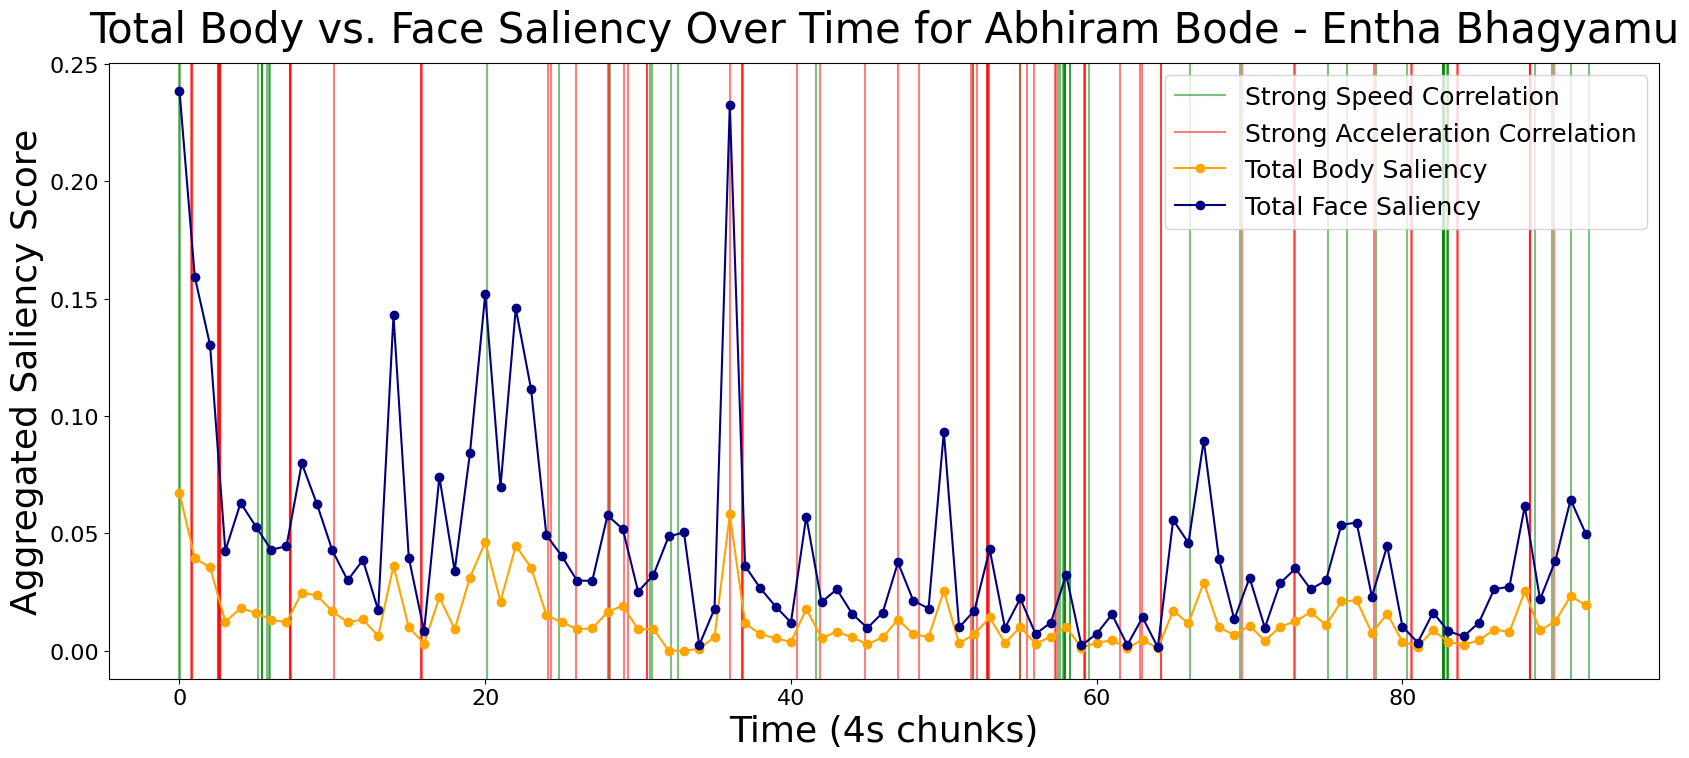

In [50]:
# Load the strong correlation windows data
correlation_file_path = '/home/gabriel/theo/masters-thesis/dataset/Abhiram Bode/Entha Bhagyamu/vocal/strong_correlation_05s_windows.json'
with open(correlation_file_path, 'r') as f:
    correlation_data = json.load(f)

strong_windows_speed = correlation_data['general']['speed']
strong_windows_accel = correlation_data['general']['accel']

# Extract the time in seconds and convert to chunk index (time / 4s)
speed_chunks = [window[0] / 4 for window in strong_windows_speed if abs(window[1]) > 0.66]
accel_chunks = [window[0] / 4 for window in strong_windows_accel if abs(window[1]) > 0.66]

# Aggregate all body part saliencies and all face part saliencies over time
average_body_saliency_over_time = np.sum(list(temporal_body_part_ig.values()), axis=0) / len(temporal_body_part_ig)
average_face_saliency_over_time = np.sum(list(temporal_face_part_ig.values()), axis=0) / len(temporal_face_part_ig)

# --- Create a single plot for aggregated body and face saliency ---
plt.figure(figsize=(20, 8))

# --- Add vertical lines for strong correlations ---
for i, chunk in enumerate(speed_chunks):
    plt.axvline(x=chunk, color='green', linewidth=1.5, alpha=0.5, label='Strong Speed Correlation' if i == 0 else "")
for i, chunk in enumerate(accel_chunks):
    plt.axvline(x=chunk, color='red', linewidth=1.5, alpha=0.5, label='Strong Acceleration Correlation' if i == 0 else "")

plt.plot(average_body_saliency_over_time, label='Total Body Saliency', marker='o', linestyle='-', color='orange')
plt.plot(average_face_saliency_over_time, label='Total Face Saliency', marker='o', linestyle='-', color='navy')


# --- Add titles and labels ---
plt.title(f'Total Body vs. Face Saliency Over Time for {artist} - {song}', fontsize=30, y=1.02)
plt.xlabel('Time (4s chunks)', fontsize=26)
plt.ylabel('Aggregated Saliency Score', fontsize=26)
plt.tick_params(axis='both', labelsize=16)
plt.legend(fontsize=18, loc='upper right')